In [196]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import plotly.graph_objs as go
from plotly.offline import iplot
from sage.symbolic.integration.integral import definite_integral

# Vectors and Matrices in Python

In [197]:
v = np.random.rand(10)

In [198]:
u = np.random.rand(10)

### Dot Product

In [199]:
v.dot(u)

2.5530731315805135

2.5530731315805135

### Cross Product

In [200]:
def cross_product(v_1, v_2):
    
    return vector([v_1[1]*v_2[2] - v_1[2]*v_2[1], - v_1[0]*v_2[2] + v_1[2]*v_2[0], v_1[0]*v_2[1] - v_1[1]*v_2[0]])

In [201]:
cross_product(v, u)

(0.0712715414752925, -0.28536544787517476, 0.1402071387508905)

(0.0712715414752925, -0.28536544787517476, 0.1402071387508905)

### Taking the Norm

In [202]:
np.linalg.norm(v)

1.7914273608648128

1.7914273608648128

In [203]:
v = v / np.linalg.norm(v)

### Matrix Multiplication

In [204]:
A = np.random.rand(2,3)

In [205]:
B = np.random.rand(3,2)

In [206]:
A @ B

array([[0.6863654 , 0.45874348],
       [0.37086008, 0.2584122 ]])

array([[0.6863654 , 0.45874348],
       [0.37086008, 0.2584122 ]])

In [207]:
B @ A

array([[0.05166107, 0.14308296, 0.22649816],
       [0.17633521, 0.56172284, 0.66350048],
       [0.08650819, 0.27163613, 0.33139369]])

array([[0.05166107, 0.14308296, 0.22649816],
       [0.17633521, 0.56172284, 0.66350048],
       [0.08650819, 0.27163613, 0.33139369]])

### Eigenvalues

In [208]:
np.linalg.eig(A @ B)

EigResult(eigenvalues=array([0.93705603, 0.00772158]), eigenvectors=array([[ 0.87751984, -0.56002533],
       [ 0.47954033,  0.82847549]]))

EigResult(eigenvalues=array([0.93705603, 0.00772158]), eigenvectors=array([[ 0.87751984, -0.56002533],
       [ 0.47954033,  0.82847549]]))

In [209]:
np.linalg.eig(B @ A)

EigResult(eigenvalues=array([ 9.37056028e-01, -8.48445620e-17,  7.72157665e-03]), eigenvectors=array([[-0.24946746, -0.97846193,  0.94258524],
       [-0.86978391,  0.17156653, -0.33283943],
       [-0.42572519,  0.11479186,  0.02740389]]))

EigResult(eigenvalues=array([ 9.37056028e-01, -8.48445620e-17,  7.72157665e-03]), eigenvectors=array([[-0.24946746, -0.97846193,  0.94258524],
       [-0.86978391,  0.17156653, -0.33283943],
       [-0.42572519,  0.11479186,  0.02740389]]))

# Symbolic Manipulation in Sage

In [210]:
var('t')

t

t

In [211]:
# some useful functions 
d_dt = lambda a : diff(a,t)
D = lambda Q : vector([d_dt(x_i) for x_i in Q])

### Evaluate a function

In [212]:
f = t^2

In [213]:
f.subs(t=2)

4

4

### Take the Limit

In [214]:
g = sin(t) / t

In [215]:
limit(g, t=0)

1

1

### Differentiate

In [216]:
h = f * g

In [217]:
d_dt(h)

t*cos(t) + sin(t)

t*cos(t) + sin(t)

### Integrate

In [218]:
definite_integral(f,t,0,1)

1/3

1/3

### Multivariable Considerations 

In [219]:
var('x')

x

x

In [220]:
definite_integral(x+t,t,0,1)

x + 1/2

x + 1/2

In [221]:
definite_integral(definite_integral(x+t,t,0,1),x,0,1)

1

1

In [222]:
v = [t, t^2, t^3]

In [223]:
D(v)

(1, 2*t, 3*t^2)

(1, 2*t, 3*t^2)

### Simplify Expressions

In [261]:
a = (sqrt(2) - 1)*(sqrt(2)+1)

In [262]:
a

(sqrt(2) + 1)*(sqrt(2) - 1)

(sqrt(2) + 1)*(sqrt(2) - 1)

In [263]:
a.simplify_full()

1

1

# Planar Graphs 

### Plotting Curves

In [224]:
a = 1
b = 0.5

def planar_curve(s):
    
    # return vector([cos(s), sin(3 * s)])
    
    return vector([a/2 + b*cos(s) + a/2*cos(2*s), b*sin(s) + a/2 * sin(2 * s)])

In [225]:
X = planar_curve(t)

In [226]:
t0 = -pi
t1 = pi
nSamples = 200

In [227]:
# vector evaluation 
curve =  np.array([planar_curve(t) for t in np.arange(t0,t1,(t1-t0)/nSamples)])

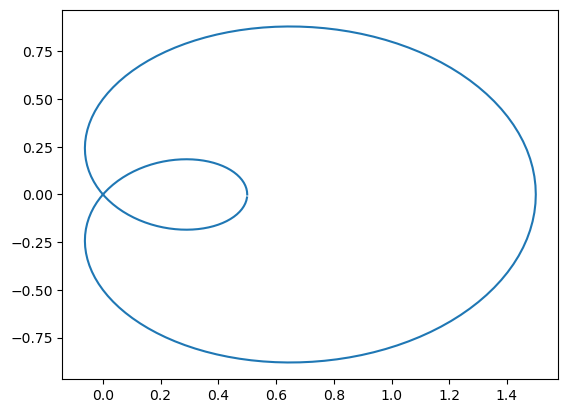

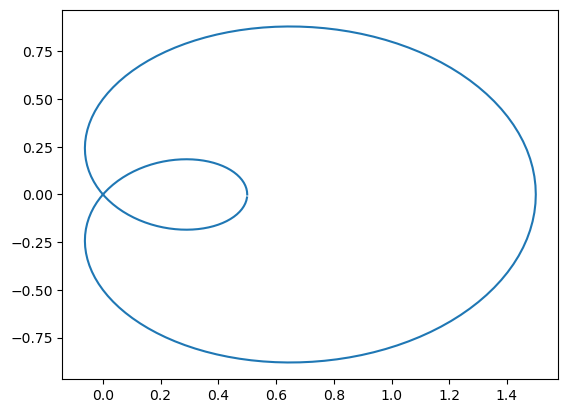

In [228]:
plt.plot(curve[:,0], curve[:,1])

### Evolute of a curve

In [229]:
def geodesic_curvature_vector(x):
    
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    
    kappa_vec = 1/speed^2 * (A - ( (A.dot_product(V)) / speed^2 ) * V )
    
    return kappa_vec

def curvature(x):

    return geodesic_curvature_vector(x).norm()

def T_vec(x):
    
    V = D(x)
    
    t_vec = V / V.norm()
    
    return t_vec.simplify_full() 

def N_vec(x):
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    speed_prime = d_dt(speed)
    
    n_vec = (speed * A -  speed_prime * V) / (speed^3 * curvature(x))
    
    return n_vec.simplify_full()

def B_vec(x):
    
    N = N_vec(x)
    T = T_vec(x)
    
    return cross_product(T, N).simplify_full()

def torsion(x):

    N_prime = D(N_vec(x))
    B = B_vec(x)
    
    tau = N_prime.dot_product(B)
    
    return tau

def angle(u,v): 
    
    return arccos(u.dot_product(v) / ( u.norm() * v.norm() ))

def signed_curvature(x):
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    
    kappa = (V[0] * A[1] - A[0] * V[1]) / speed^3
    
    return kappa

def rotation_index(x,t_0,t_1):
        
    integral_expr = signed_curvature(x)*D(x).norm()
    
    def integrand(z):
        
        return integral_expr.subs(t = z, hold=False)
    
    return integrate.quad(integrand, t_0, t_1)[0] / (2 * float(pi))

def evolute(x):
    
    return x + N_vec(x) / signed_curvature(x)

In [230]:
Y = evolute(X)

In [231]:
Y

((2*(4*cos(t) + 7)*sin(t)^2 - 7*cos(t) - 8)*(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*(16*cos(t)^2 + 40*cos(t) + 25)*sqrt((4*cos(t)^2 + 12*cos(t) + 9)/(64*cos(t)^3 + 240*cos(t)^2 + 300*cos(t) + 125))) + 1/2*cos(2*t) + 0.500000000000000*cos(t) + 1/2, -(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)*(8*cos(t)^2 + 14*cos(t) + 3)*sin(t)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*(16*cos(t)^2 + 40*cos(t) + 25)*sqrt((4*cos(t)^2 + 12*cos(t) + 9)/(64*cos(t)^3 + 240*cos(t)^2 + 300*cos(t) + 125))) + 1/2*sin(2*t) + 0.500000000000000*sin(t))

((2*(4*cos(t) + 7)*sin(t)^2 - 7*cos(t) - 8)*(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*(16*cos(t)^2 + 40*cos(t) + 25)*sqrt((4*cos(t)^2 + 12*cos(t) + 9)/(64*cos(t)^3 + 240*cos(t)^2 + 300*cos(t) + 125))) + 1/2*cos(2*t) + 0.500000000000000*cos(t) + 1/2, -(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)*(8*cos(t)^2 + 14*cos(t) + 3)*sin(t)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*(16*cos(t)^2 + 40*cos(t) + 25)*sqrt((4*cos(t)^2 + 12*cos(t) + 9)/(64*cos(t)^3 + 240*cos(t)^2 + 300*cos(t) + 125))) + 1/2*sin(2*t) + 0.500000000000000*sin(t))

In [232]:
def evolute_function_handle(x) :
    
    return Y.subs(t = x, hold=False)

In [233]:
# symbolic evaluation
curve =  np.array(list(map(planar_curve,np.arange(t0,t1,(t1-t0)/nSamples)))) 
evolute_curve = np.array(list(map(evolute_function_handle,np.arange(t0,t1,(t1-t0)/nSamples)))) 

(-1.8800367553350505, 1.8800367553350505)

(-1.8800367553350505, 1.8800367553350505)

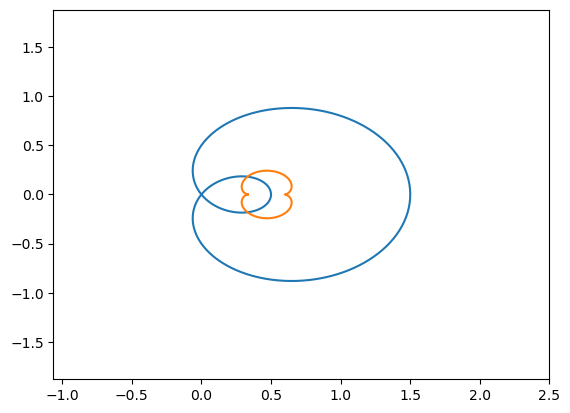

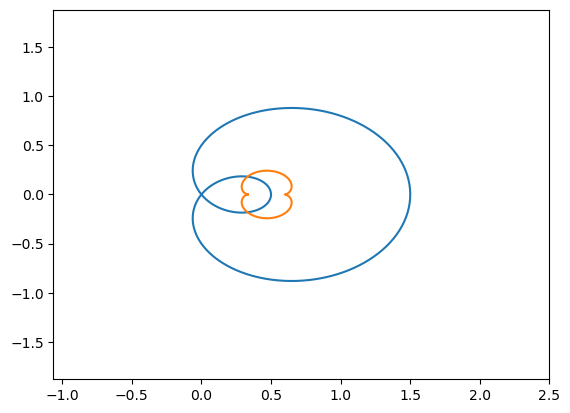

In [234]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(evolute_curve[:,0], evolute_curve[:,1])
plt. xlim(float(min(curve[:,0])) - 1, float(max(curve[:,0])) + 1)
plt. ylim(float(min(curve[:,1])) - 1, float(max(curve[:,1])) + 1)

### Rotation Index of a Curve

In [235]:
rotation_index(X,t0,t1)

1.9999999999999998

1.9999999999999998

# 3-Dimensional Curves

### Define the Embedding 

In [236]:
a = 1
b = 1
L = sqrt(a^2 + b^2)

In [237]:
def space_curve(s):
    
    return vector([a * cos(s / L), a * sin(s / L), b * s / L])

    #return vector([a * cos(s / L), a * sin(s / L), b * s / L])

    #return vector([cos(2 * s), sin(1 + s)*cos(1 + 2*s), sin(s + 2)])

In [238]:
X = space_curve(t)

In [239]:
X

(cos(1/2*sqrt(2)*t), sin(1/2*sqrt(2)*t), 1/2*sqrt(2)*t)

(cos(1/2*sqrt(2)*t), sin(1/2*sqrt(2)*t), 1/2*sqrt(2)*t)

### Calculating Curvature

In [240]:
curvature(X)

sqrt(abs(cos(1/2*sqrt(2)*t)/(abs(cos(1/2*sqrt(2)*t))^2 + abs(sin(1/2*sqrt(2)*t))^2 + 1))^2 + abs(sin(1/2*sqrt(2)*t)/(abs(cos(1/2*sqrt(2)*t))^2 + abs(sin(1/2*sqrt(2)*t))^2 + 1))^2)

sqrt(abs(cos(1/2*sqrt(2)*t)/(abs(cos(1/2*sqrt(2)*t))^2 + abs(sin(1/2*sqrt(2)*t))^2 + 1))^2 + abs(sin(1/2*sqrt(2)*t)/(abs(cos(1/2*sqrt(2)*t))^2 + abs(sin(1/2*sqrt(2)*t))^2 + 1))^2)

In [241]:
curvature(X).full_simplify()

1/2

1/2

### Calculate Frenet Frame

In [242]:
myTVec = T_vec(X)

In [243]:
myNVec = N_vec(X)

In [244]:
myBVec = B_vec(X)

### Calculate Torsion

In [245]:
torsion(X)

1/2*cos(1/2*sqrt(2)*t)^2 + 1/2*sin(1/2*sqrt(2)*t)^2

1/2*cos(1/2*sqrt(2)*t)^2 + 1/2*sin(1/2*sqrt(2)*t)^2

### Plot Curve in 3-Space

In [246]:
t0 = -pi
t1 = pi
T = np.arange(t0,t1,0.01)

In [247]:
W = np.array(list(map(space_curve,T)))

plot_this = []
plot_this.append(go.Scatter3d(
           x = W[:,0], y = W[:,1], z = W[:,2], mode = 'markers', marker = dict(
              size = 2,
              color = "orange", # set color to an array/list of desired values
              colorscale = 'Viridis'
              )
           ))

layout = go.Layout(autosize=False, width=1000, height=1000, showlegend = False)
    
fig = go.Figure(data = plot_this, layout = layout)

#fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

iplot(fig)

### Plot Curve with Frenet Frame (ADVANCED)

In [248]:
W = np.array(list(map(space_curve,T)))

plot_this = []
plot_this.append(go.Scatter3d(
           x = W[:,0], y = W[:,1], z = W[:,2], mode = 'markers', marker = dict(
              size = 2,
              color = "orange", # set color to an array/list of desired values
              colorscale = 'Viridis'
              )
           ))

for time_step in np.arange(t0,t1,0.2):
    currPosition = space_curve(time_step)
    vec = myTVec.subs(t = time_step, hold=False)
    Tvector = go.Scatter3d( x = [currPosition[0],currPosition[0] + vec[0]],
                           y = [currPosition[1],currPosition[1] + vec[1]],
                           z = [currPosition[2],currPosition[2] + vec[2]],
                        marker = dict( size = 1,color = "rgb(0,0,255)"),
                        line = dict( color = "rgb(0,0,255)",width = 6)
    )
    plot_this.append(Tvector)
    
    vec = myNVec.subs(t = time_step, hold=False)
    Nvector = go.Scatter3d( x = [currPosition[0],currPosition[0] + vec[0]],
                           y = [currPosition[1],currPosition[1] + vec[1]],
                           z = [currPosition[2],currPosition[2] + vec[2]],
                        marker = dict( size = 1,color = "rgb(0,255,0)"),
                        line = dict( color = "rgb(0,255,0)",width = 6)
    )
    plot_this.append(Nvector)
    
    vec = myBVec.subs(t = time_step, hold=False)
    Bvector = go.Scatter3d( x = [currPosition[0],currPosition[0] + vec[0]],
                           y = [currPosition[1],currPosition[1] + vec[1]],
                           z = [currPosition[2],currPosition[2] + vec[2]],
                        marker = dict( size = 1,color = "rgb(255,0,0)"),
                        line = dict( color = "rgb(255,0,0)",width = 6)
    )
    plot_this.append(Bvector)

layout = go.Layout(autosize=False, width=1000, height=1000, showlegend = False)
    
fig = go.Figure(data = plot_this, layout = layout)

#fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

iplot(fig)

# 3-Dimensional Surfaces 

### Cartesian Coordinates

In [249]:
X = np.arange(-pi,pi,0.1)
Y = np.arange(-pi,pi,0.1)

X_, Y_ = np.meshgrid(X, Y)

In [250]:
def surface_function(x,y):
    
    return math.sin(x ** 2 + y ** 2)

vfunc = np.vectorize(surface_function)

Z_ = vfunc(X_, Y_)

In [251]:
things_to_plot = []

things_to_plot.append(
    go.Surface(x = X_, y = Y_, z = Z_)
)

layout = go.Layout(autosize=False, width=900, height=900, showlegend = False)
fig = go.Figure(data = things_to_plot, layout = layout)
iplot(fig)

### Parametrized Coordinates 1

In [252]:
U = np.arange(0,2*math.pi,0.1)
V = np.arange(0,2*math.pi,0.1)

U_, V_ = np.meshgrid(U, V)

In [253]:
def parametrized_function(u,v):
    
    return math.cos(u), math.sin(u), v

parametrizedfunc = np.vectorize(parametrized_function)

X_, Y_, Z_ = parametrizedfunc(U_, V_)

In [254]:
things_to_plot = []

things_to_plot.append(
    go.Surface(x = X_, y = Y_, z = Z_)
)

layout = go.Layout(autosize=False, width=900, height=900, showlegend = False)
fig = go.Figure(data = things_to_plot, layout = layout)
iplot(fig)

### Parametrized Coordinates 2

In [255]:
Theta = np.arange(-math.pi/2,math.pi/2,0.05)
Phi = np.arange(0,2*math.pi,0.05)

Theta_, Phi_ = np.meshgrid(Theta, Phi)

In [256]:
def parametrized_function_2(u,v):
    
    return math.cos(u)*math.sin(v), math.sin(u)*math.sin(v), math.cos(v)

zfunc = np.vectorize(parametrized_function_2)

X_, Y_, Z_ = zfunc(Theta_, Phi_)

In [257]:
things_to_plot = []

things_to_plot.append(
    go.Surface(x = X_, y = Y_, z = Z_)
)

layout = go.Layout(autosize=False, width=900, height=900, showlegend = False)
fig = go.Figure(data = things_to_plot, layout = layout)
iplot(fig)

### Parametrized Coordinates 3

In [258]:
Theta = np.arange(0,2 * math.pi,0.1)
Phi = np.arange(-math.pi,math.pi,0.1)

Theta_, Phi_ = np.meshgrid(Theta, Phi)

In [259]:
a = 4
b = 2

def parametrized_function_3(theta,phi):
    
    return ((a + b * math.cos(theta)) * math.cos(phi), (a + b * math.cos(theta)) * math.sin(phi), b * math.sin(theta))

zfunc = np.vectorize(parametrized_function_3)

X_, Y_, Z_ = zfunc(Theta_, Phi_)

In [260]:
things_to_plot = []

things_to_plot.append(
    go.Surface(x = X_, y = Y_, z = Z_)
)

layout = go.Layout(autosize=False, width=900, height=900, showlegend = False, scene=dict(
                 aspectmode='data'
         ))
fig = go.Figure(data = things_to_plot, layout = layout)
iplot(fig)